# MNIST Handwritten Digit Classification

## Packages

Tensorflow and Keras provide an easy, fast, and powerful approach to generate neural network models.

In [38]:
import tensorflow as tf
from tensorflow import keras

The following packages are generally always worth loading for their data processing and data visualization tools.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Data

Keras conveniently provides the mnist dataset.

In [40]:
mnist = keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [41]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


Each row of the MNIST data is a handwritten digit. We can view each row:

3


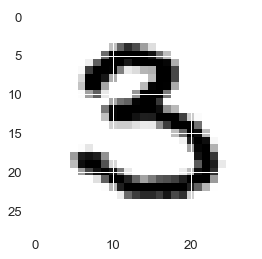

In [42]:
row_num = np.random.randint(60000)
print(ytrain[row_num])
plt.imshow(xtrain[row_num], cmap = "gray_r")

Before we start modelling, we must normalize the data. Each training column is normalized to be between 0 and 1. The test sample is normalized based on the training sample.

In [43]:
xtrain = (xtrain - xtrain.min()) / (xtrain.max() - xtrain.min())
xtest = (xtest - xtrain.min()) / (xtrain.max() - xtrain.min())

## Model 1 - Single Layer Softmax

Keras models are a sequential organization of layers.

Many models will begin with a Flatten layer: The 28x28 matrix input is converted to a vector of length 784. 

Every model will end with a Dense Softmax layer: The probabilities each class. The target class will have the highest probability.

In model 1, this is all that is done.

In [44]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

Next, we compile the model to specify optimization method, loss function, etc.

In [45]:
model1.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

Now the model can be trained. Some options that we can configure are our validation split, batch size, and number of epochs.

In [46]:
model1.fit(xtrain, ytrain, validation_split=.1, batch_size=1000, epochs=5)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 16us/sample - loss: 1.6339 - acc: 0.5618 - val_loss: 0.9727 - val_acc: 0.8282
Epoch 2/5
54000/54000 [==============================] - 1s 10us/sample - loss: 0.8363 - acc: 0.8212 - val_loss: 0.6215 - val_acc: 0.8783
Epoch 3/5
54000/54000 [==============================] - 1s 11us/sample - loss: 0.6255 - acc: 0.8568 - val_loss: 0.4935 - val_acc: 0.8945
Epoch 4/5
54000/54000 [==============================] - 1s 10us/sample - loss: 0.5303 - acc: 0.8728 - val_loss: 0.4265 - val_acc: 0.8997
Epoch 5/5
54000/54000 [==============================] - 1s 10us/sample - loss: 0.4750 - acc: 0.8824 - val_loss: 0.3866 - val_acc: 0.9040


Finally, we can evaluate the fit on our test sample.

In [47]:
test_loss1, test_acc1 = model1.evaluate(xtest, ytest)
print("Loss: ", test_loss1)
print("Acc: ", test_acc1)

10000/10000 [==============================] - 0s 38us/sample - loss: 1.6621 - acc: 0.8945
Loss:  1.6621355760376675
Acc:  0.8945


And using sklearn and seaborn, we can plot a confusion matrix heatmap.

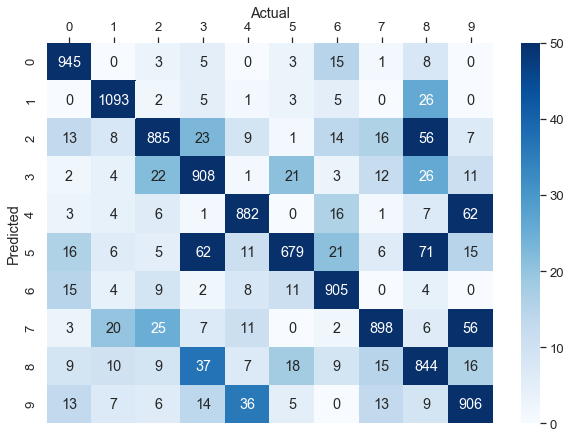

In [48]:
ypred1 = model1.predict_classes(xtest)
cm1 = metrics.confusion_matrix(ytest, ypred1)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)
ax = sn.heatmap(cm1, annot = True, fmt = 'd', cmap = "Blues", vmax = 50)
ax.set(xlabel='Actual', ylabel='Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

For this simple model, we can plot the weights for each class in a meaningul way.

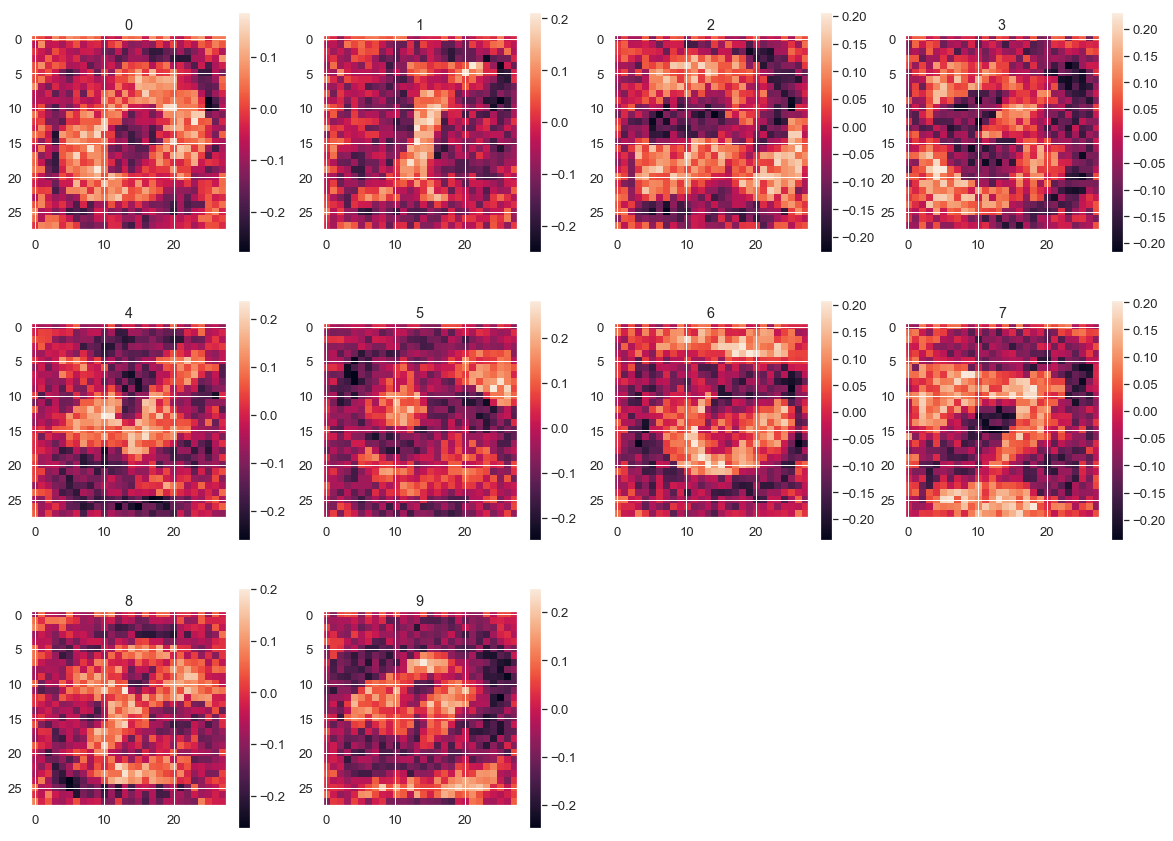

In [49]:
m1wts = model1.get_weights()
plt.figure(figsize = (20,15))
for i in range(0,10):
    plt.subplot(3,4,i+1).title.set_text(i)
    plt.imshow(m1wts[0][:,i].reshape(28,28))
    plt.colorbar()

### Hyperparameter Tuning

We try different combinations of hyperparameters, such as L2 regularization and dropout, by creating a dictionary of models and looping through them.

In [50]:
models1 = {
    "model1_1" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model1_2" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(10, activation = tf.nn.softmax, kernel_regularizer=keras.regularizers.l2(1e-2))
        ])
    ],
    "model1_3" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dropout(.8),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model1_4" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dropout(.8),
        keras.layers.Dense(10, activation = tf.nn.softmax, kernel_regularizer=keras.regularizers.l2(1e-2))
        ])
    ]
}

In [51]:
for k in models1:
    # compile
    models1[k][0].compile(
        optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
    )
    # train
    models1[k][0].fit(xtrain, ytrain, validation_split=.1, batch_size=1000, epochs=5)
    # evaluate
    models1[k].append(models1[k][0].evaluate(xtest, ytest))    

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 17us/sample - loss: 1.5289 - acc: 0.5914 - val_loss: 0.9107 - val_acc: 0.8320
Epoch 2/5
54000/54000 [==============================] - 1s 10us/sample - loss: 0.8030 - acc: 0.8216 - val_loss: 0.5947 - val_acc: 0.8797
Epoch 3/5
54000/54000 [==============================] - 1s 11us/sample - loss: 0.6078 - acc: 0.8572 - val_loss: 0.4763 - val_acc: 0.8963
Epoch 4/5
54000/54000 [==============================] - 1s 10us/sample - loss: 0.5179 - acc: 0.8726 - val_loss: 0.4149 - val_acc: 0.9032
Epoch 5/5
10000/10000 [==============================] - 1s 62us/sample - loss: 1.6395 - acc: 0.8957
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 17us/sample - loss: 1.6356 - acc: 0.6363 - val_loss: 1.0507 - val_acc: 0.8393
Epoch 2/5
54000/54000 [==============================] - 1s 11us/sample - loss: 0.9729 - acc: 0.8244 - val_loss

In [52]:
for k in models1:
    print(k, ": Test Accuracy:",models1[k][1][1])

model1_1 : Test Accuracy: 0.8957
model1_2 : Test Accuracy: 0.8886
model1_3 : Test Accuracy: 0.8801
model1_4 : Test Accuracy: 0.8715


Here, we can see the effects that L2 regularization and droupout have on our weights.

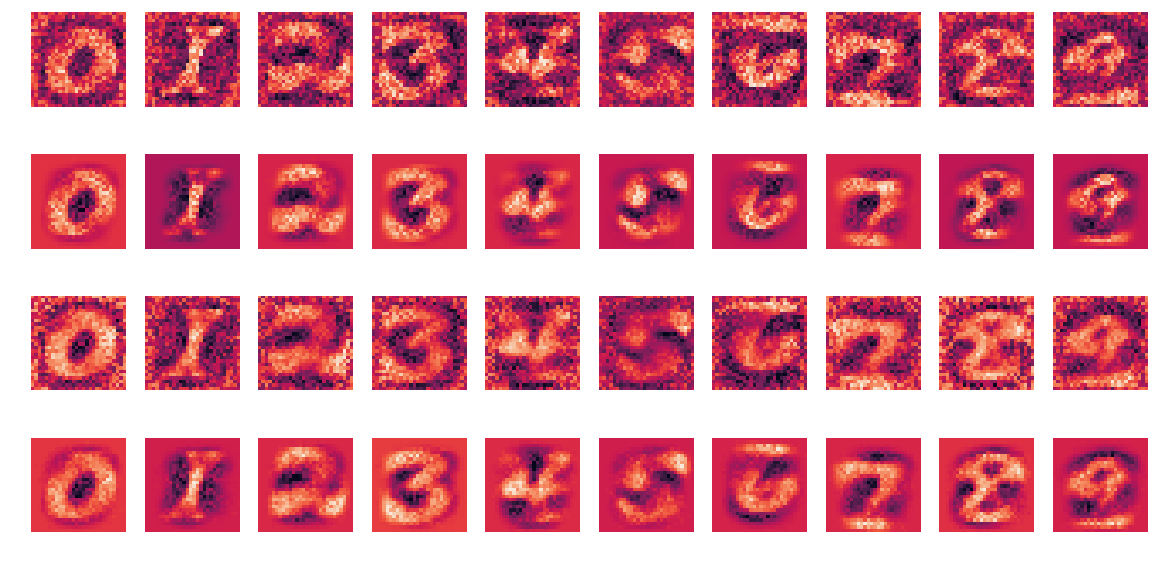

In [53]:
plt.figure(figsize = (20,10))

for i,k in enumerate(models1):
    m1wts = models1[k][0].get_weights()
    for j in range(0,10):
        plt.subplot(4,10,10*i+j+1)
        plt.imshow(m1wts[0][:,j].reshape(28,28))
        plt.axis('off')

## Model 2 - ReLu Hidden Layer

In model 2, we introduce a ReLu (Rectified Linear) hidden layer. 

ReLu(x) = max(0,x)

Again, we train multiple models at once to see the effects of different hyperparameters.

In [54]:
models2 = {
    "model2_1" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model2_2" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model2_3" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model2_4" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ]
}

In [55]:
for k in models2:
    # compile
    models2[k][0].compile(
        optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
    )
    # train
    models2[k][0].fit(xtrain, ytrain, validation_split=.1, batch_size=1000, epochs=5)
    # evaluate
    models2[k].append(models2[k][0].evaluate(xtest, ytest))  

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 18us/sample - loss: 0.5901 - acc: 0.8413 - val_loss: 0.2323 - val_acc: 0.9372
Epoch 2/5
54000/54000 [==============================] - 1s 12us/sample - loss: 0.2437 - acc: 0.9316 - val_loss: 0.1709 - val_acc: 0.9557
Epoch 3/5
54000/54000 [==============================] - 1s 12us/sample - loss: 0.1845 - acc: 0.9479 - val_loss: 0.1374 - val_acc: 0.9645
Epoch 4/5
54000/54000 [==============================] - 1s 13us/sample - loss: 0.1474 - acc: 0.9591 - val_loss: 0.1171 - val_acc: 0.9687
Epoch 5/5
10000/10000 [==============================] - 1s 67us/sample - loss: 0.5304 - acc: 0.9663
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 20us/sample - loss: 0.6372 - acc: 0.8418 - val_loss: 0.2765 - val_acc: 0.9370
Epoch 2/5
54000/54000 [==============================] - 1s 13us/sample - loss: 0.2916 - acc: 0.9306 - val_loss

In [56]:
for k in models2:
    print(k, ": Test Accuracy:",models2[k][1][1])

model2_1 : Test Accuracy: 0.9663
model2_2 : Test Accuracy: 0.9642
model2_3 : Test Accuracy: 0.9622
model2_4 : Test Accuracy: 0.965


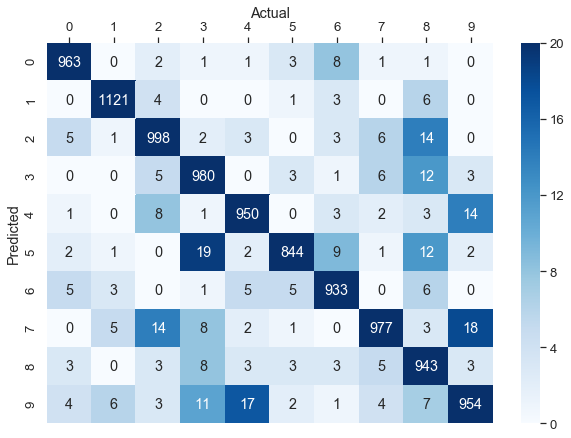

In [57]:
ypred2 = models2["model2_1"][0].predict_classes(xtest)
cm1 = metrics.confusion_matrix(ytest, ypred2)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)
ax = sn.heatmap(cm1, annot = True, fmt = 'd', cmap = "Blues", vmax = 20)
ax.set(xlabel='Actual', ylabel='Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

## Model 3 - ReLu Hidden Layers

For model 3, lets add another ReLu layer, for a total of 2.

In [58]:
models3 = {
    "model3_1" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model3_2" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model3_3" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model3_4" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ]
}

In [59]:
for k in models3:
    # compile
    models3[k][0].compile(
        optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
    )
    # train
    models3[k][0].fit(xtrain, ytrain, validation_split=.1, batch_size=1000, epochs=5)
    # evaluate
    models3[k].append(models3[k][0].evaluate(xtest, ytest))  

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 20us/sample - loss: 0.4962 - acc: 0.8657 - val_loss: 0.1770 - val_acc: 0.9505
Epoch 2/5
54000/54000 [==============================] - 1s 13us/sample - loss: 0.1734 - acc: 0.9496 - val_loss: 0.1222 - val_acc: 0.9652
Epoch 3/5
54000/54000 [==============================] - 1s 13us/sample - loss: 0.1174 - acc: 0.9656 - val_loss: 0.0985 - val_acc: 0.9710
Epoch 4/5
54000/54000 [==============================] - 1s 12us/sample - loss: 0.0832 - acc: 0.9758 - val_loss: 0.0793 - val_acc: 0.9757
Epoch 5/5
10000/10000 [==============================] - 1s 74us/sample - loss: 0.3947 - acc: 0.9750
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 23us/sample - loss: 0.5968 - acc: 0.8668 - val_loss: 0.2606 - val_acc: 0.9547
Epoch 2/5
54000/54000 [==============================] - 1s 13us/sample - loss: 0.2651 - acc: 0.9490 - val_loss

In [60]:
for k in models3:
    print(k, ": Test Accuracy:", models3[k][1][1])

model3_1 : Test Accuracy: 0.975
model3_2 : Test Accuracy: 0.9736
model3_3 : Test Accuracy: 0.9731
model3_4 : Test Accuracy: 0.9739


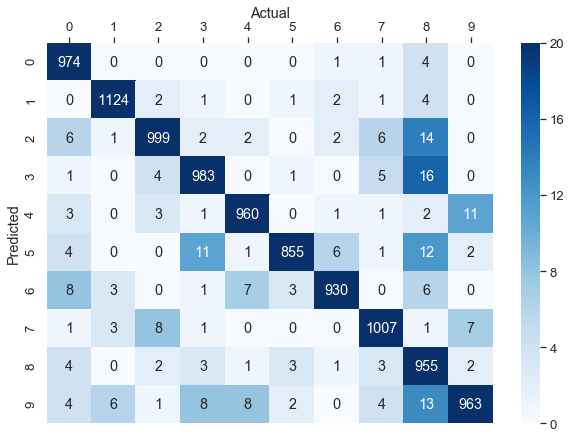

In [61]:
ypred3 = models3["model3_1"][0].predict_classes(xtest)
cm1 = metrics.confusion_matrix(ytest, ypred3)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)
ax = sn.heatmap(cm1, annot = True, fmt = 'd', cmap = "Blues", vmax = 20)
ax.set(xlabel='Actual', ylabel='Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

## Model 4 - CNN

Finally, let's use a convolutional neural network.

Each model uses two convolution layers seperated by a max pooling layer.

The first convolution layer consists of 64 filters, and a 3x3 window.

Then, there is a max pooling layer with a 2x2 window.

The second convolution layer has 32 filters, and a 3x3 window.

Afterwards, we flatten the image and pass on to a dense reLu layer, with possible L2 regularization and dropout.

In [64]:
models4 = {
    "model4_1" : [
        keras.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu),
        keras.layers.Flatten(),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model4_2" : [
        keras.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu),
        keras.layers.Flatten(),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model4_3" : [
        keras.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model4_4" : [
        keras.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ]
}

In [65]:
for k in models4:
    # compile
    models4[k][0].compile(
        optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
    )
    # train
    models4[k][0].fit(xtrain.reshape(60000,28,28,1), ytrain, validation_split=.1, batch_size=1000, epochs=5)
    # evaluate
    models4[k].append(models4[k][0].evaluate(xtest.reshape(10000,28,28,1), ytest))  

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 3s 60us/sample - loss: 0.4839 - acc: 0.8631 - val_loss: 0.1257 - val_acc: 0.9643
Epoch 2/5
54000/54000 [==============================] - 1s 26us/sample - loss: 0.1062 - acc: 0.9682 - val_loss: 0.0676 - val_acc: 0.9827
Epoch 3/5
54000/54000 [==============================] - 1s 24us/sample - loss: 0.0615 - acc: 0.9817 - val_loss: 0.0546 - val_acc: 0.9853
Epoch 4/5
54000/54000 [==============================] - 1s 24us/sample - loss: 0.0443 - acc: 0.9868 - val_loss: 0.0448 - val_acc: 0.9883
Epoch 5/5
10000/10000 [==============================] - 1s 88us/sample - loss: 0.2123 - acc: 0.9865
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 2s 41us/sample - loss: 0.5577 - acc: 0.8755 - val_loss: 0.1938 - val_acc: 0.9682
Epoch 2/5
54000/54000 [==============================] - 1s 25us/sample - loss: 0.1780 - acc: 0.9684 - val_loss

In [66]:
for k in models4:
    print(k, ": Test Accuracy:", models4[k][1][1])

model4_1 : Test Accuracy: 0.9865
model4_2 : Test Accuracy: 0.9894
model4_3 : Test Accuracy: 0.9885
model4_4 : Test Accuracy: 0.989


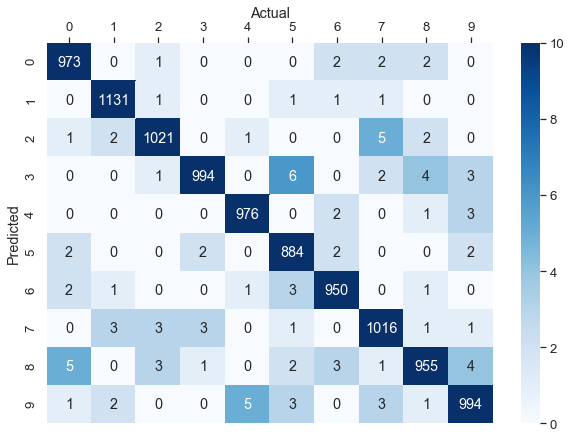

In [67]:
ypred4 = models4["model4_2"][0].predict_classes(xtest.reshape(10000,28,28,1))
cm1 = metrics.confusion_matrix(ytest, ypred4)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)
ax = sn.heatmap(cm1, annot = True, fmt = 'd', cmap = "Blues", vmax = 10)
ax.set(xlabel='Actual', ylabel='Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

## Best Model

In [68]:
models = {**models1, **models2, **models3, **models4}
acc = {}
for k in models:
    acc[k] = models[k][1][1]
bestModel = max(acc, key=acc.get)
print("Best Accuracy Model:", bestModel)
print("with accuracy:", models[bestModel][1][1])

Best Accuracy Model: model4_2
with accuracy: 0.9894


Lets look at some examples of misclassifications.

In [69]:
ypred4 = models[bestModel][0].predict_classes(xtest.reshape(10000,28,28,1))
errors = list(np.where((ypred4 == ytest) == False)[0])

Actual: 9
Predicted: 5


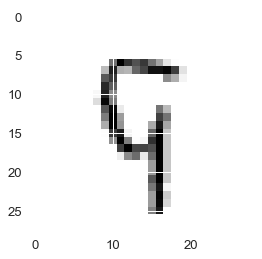

In [70]:
row_num = errors[0]
print("Actual:", ytest[row_num])
print("Predicted:", ypred4[row_num])
plt.imshow(xtest[row_num], cmap = "gray_r")

Actual: 2
Predicted: 7


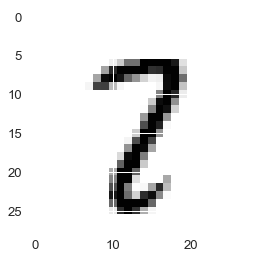

In [71]:
row_num = errors[1]
print("Actual:", ytest[row_num])
print("Predicted:", ypred4[row_num])
plt.imshow(xtest[row_num], cmap = "gray_r")

Actual: 3
Predicted: 5


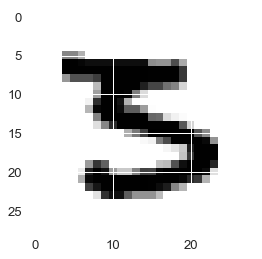

In [72]:
row_num = errors[2]
print("Actual:", ytest[row_num])
print("Predicted:", ypred4[row_num])
plt.imshow(xtest[row_num], cmap = "gray_r")

## Early Stopping

Let's take the architecture of the best model, set up some finer hyperparameter tuning, and let it train until the validation loss stops decreasing.

In [73]:
es = keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    min_delta = 0,
    patience = 2,
    verbose = 0,
    mode = "auto"
)

In [74]:
models5 = {
    "model5_1" : [
        keras.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-3)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model5_2" : [
        keras.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model5_3" : [
        keras.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-3)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model5_4" : [
        keras.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ]
}

In [75]:
for k in models5:
    # compile
    models5[k][0].compile(
        optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
    )
    # train
    models5[k][0].fit(xtrain.reshape(60000,28,28,1), 
                      ytrain, 
                      validation_split=.2, 
                      batch_size=1000, 
                      epochs=100, 
                      #verbose=0,
                      callbacks=[es])
    # evaluate
    models5[k].append(models5[k][0].evaluate(xtest.reshape(10000,28,28,1), ytest)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 49us/sample - loss: 1.1213 - acc: 0.8247 - val_loss: 0.5247 - val_acc: 0.9506
Epoch 2/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.4185 - acc: 0.9545 - val_loss: 0.2838 - val_acc: 0.9758
Epoch 3/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.2606 - acc: 0.9696 - val_loss: 0.1947 - val_acc: 0.9821
Epoch 4/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.1947 - acc: 0.9746 - val_loss: 0.1644 - val_acc: 0.9807
Epoch 5/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.1671 - acc: 0.9759 - val_loss: 0.1377 - val_acc: 0.9839
Epoch 6/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.1445 - acc: 0.9794 - val_loss: 0.1281 - val_acc: 0.9834
Epoch 7/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.1393 - acc: 0.9795 - val_l

Epoch 17/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0842 - acc: 0.9884 - val_loss: 0.0857 - val_acc: 0.9891
Epoch 18/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0830 - acc: 0.9890 - val_loss: 0.0852 - val_acc: 0.9888
Epoch 19/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0801 - acc: 0.9901 - val_loss: 0.0878 - val_acc: 0.9868
Epoch 20/100
10000/10000 [==============================] - 1s 96us/sample - loss: 0.2931 - acc: 0.9846
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 51us/sample - loss: 0.6076 - acc: 0.8491 - val_loss: 0.2476 - val_acc: 0.9531
Epoch 2/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.2109 - acc: 0.9617 - val_loss: 0.1645 - val_acc: 0.9748
Epoch 3/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.1548 - acc: 0.9759 - val_loss: 0.1388 - val_acc: 0.9799
Epo

In [76]:
for k in models5:
    print(k, ": Test Accuracy:", models5[k][1][1])

model5_1 : Test Accuracy: 0.9857
model5_2 : Test Accuracy: 0.9914
model5_3 : Test Accuracy: 0.9846
model5_4 : Test Accuracy: 0.99


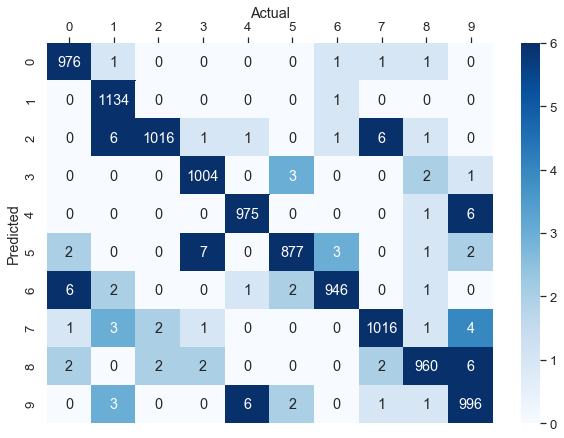

In [77]:
ypred5 = models5["model5_4"][0].predict_classes(xtest.reshape(10000,28,28,1))
cm1 = metrics.confusion_matrix(ytest, ypred5)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)
ax = sn.heatmap(cm1, annot = True, fmt = 'd', cmap = "Blues", vmax = 6)
ax.set(xlabel='Actual', ylabel='Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

In [ ]:
errors = list(np.where((ypred4 == ytest) == False)[0])